# Student Subjectivity in Course Evaluations

In [7]:
import pandas as pd
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Create the dataset

In [8]:
set_df = pd.read_csv('cleaned-set.csv')
tcf_df = pd.read_csv('cleaned-tcf.csv')

In [4]:
print(set_df.shape)
print(tcf_df.shape)

(614, 1)
(408, 11)


In [9]:
# Calculate sentiment analysis scores
sia = SentimentIntensityAnalyzer()

tcf_df['Compound Score'] = tcf_df['Review Text'].apply(lambda text: sia.polarity_scores(text)["compound"])
tcf_df['Positive Score'] = tcf_df['Review Text'].apply(lambda text: sia.polarity_scores(text)["pos"])
tcf_df['Neutral Score'] = tcf_df['Review Text'].apply(lambda text: sia.polarity_scores(text)["neu"])
tcf_df['Negative Score'] = tcf_df['Review Text'].apply(lambda text: sia.polarity_scores(text)["neg"])
tcf_df["Extremity"] = tcf_df['Compound Score'].abs()

set_df['Compound Score'] = set_df['Comments'].apply(lambda text: sia.polarity_scores(text)["compound"])
set_df['Positive Score'] = set_df['Comments'].apply(lambda text: sia.polarity_scores(text)["pos"])
set_df['Neutral Score'] = set_df['Comments'].apply(lambda text: sia.polarity_scores(text)["neu"])
set_df['Negative Score'] = set_df['Comments'].apply(lambda text: sia.polarity_scores(text)["neg"])
set_df["Extremity"] = set_df['Compound Score'].abs()

In [10]:
# join the data together
set_df['Source'] = 'SET'

mini_tcf_df = tcf_df[['Review Text', 'Compound Score', 'Positive Score', 'Neutral Score', 'Negative Score']]
mini_tcf_df['Source'] = 'TCF'
mini_tcf_df = mini_tcf_df.rename(columns={"Review Text":"Comments"})

df = pd.concat([set_df, mini_tcf_df])

# move Source to be the first column
source_col = df.pop('Source')
df.insert(0, 'Source', source_col)

# save dataframe to csv
#df.to_csv('student_eval_data.csv', index=False)

/tmp/ipykernel_2556/4039193378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_tcf_df['Source'] = 'TCF'


## Exploratory Data Analysis
### SET Data
Compound Score Analysis

In [11]:
var = "Compound Score"
print(set_df[var].describe(),'\n') # Describe the numeric variable

count    614.000000
mean       0.507220
std        0.384798
min       -0.898100
25%        0.361200
50%        0.597400
75%        0.795400
max        0.991800
Name: Compound Score, dtype: float64 



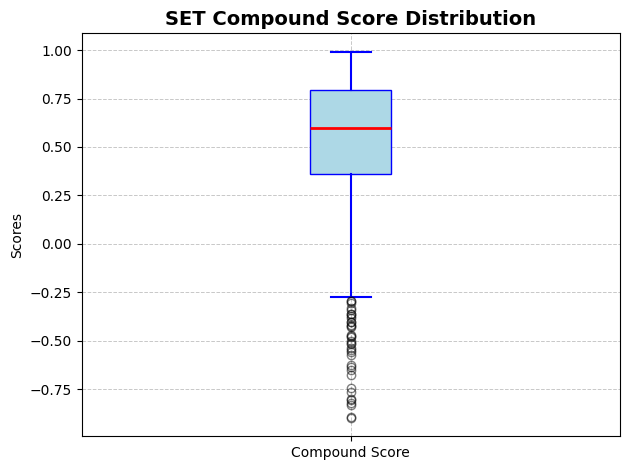

In [12]:
# set_df[var].plot.box()
# plt.title("SET Compound Score Distribution")

set_df[var].plot.box(
    patch_artist=True,  # Enable custom colors
    boxprops=dict(facecolor='lightblue', color='blue'),  # box
    medianprops=dict(color='red', linewidth=2),  # median line
    whiskerprops=dict(color='blue', linewidth=1.5),  # whiskers
    capprops=dict(color='blue', linewidth=1.5),  # caps
    flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
)

plt.title("SET Compound Score Distribution", fontsize=14, fontweight='bold')
plt.ylabel('Scores')

# Customizing the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding some padding
plt.tight_layout()

plt.show()

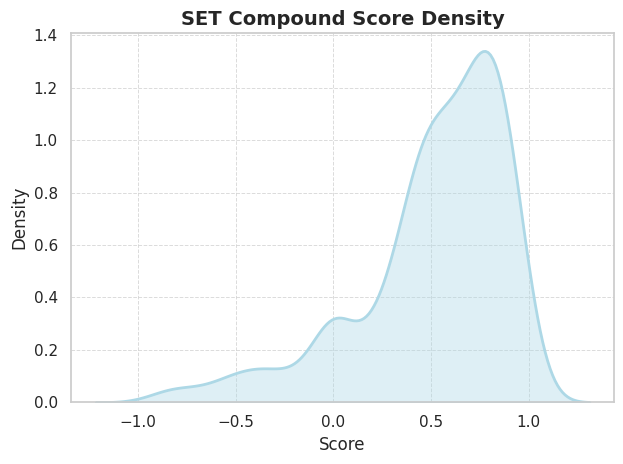

In [13]:
# set_df[var].hist()
# sns.kdeplot(set_df[var])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")  # Clean white background with gridlines

# Create the KDE plot
sns.kdeplot(set_df[var], 
            color='lightblue',  # Set line color
            fill=True,  # Fill under the KDE curve
            alpha=0.4,  # Transparency of the fill
            linewidth=2)  # Thickness of the line

# Add title and labels
plt.title("SET Compound Score Density", fontsize=14, fontweight='bold')
plt.xlabel('Score')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

Comments that have the top five highest scores.

In [14]:
# organize based on top 5 extremity
set_df.sort_values(by=["Extremity"], ascending=False).head()

,Comments,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity,Source
447,I am not an economics major or an intended pre...,0.9918,0.250,0.734,0.016,0.9918,SET
422,Lectures were very engaging if you paid attent...,0.9891,0.241,0.737,0.022,0.9891,SET
224,Professor Elzinga's lectures were refreshing. ...,0.9831,0.306,0.638,0.056,0.9831,SET
424,Excellent and informative course. Despite this...,0.9741,0.318,0.682,0.000,0.9741,SET
27,I really learned a lot about economics! I didn...,0.9730,0.407,0.573,0.019,0.9730,SET


In [15]:
set_df.sort_values(by=["Compound Score"], ascending=True).head()

,Comments,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity,Source
201,It was great to learn from such an established...,-0.8981,0.065,0.742,0.193,0.8981,SET
458,The lack of open rubric to the students when n...,-0.8957,0.000,0.670,0.330,0.8957,SET
148,My expo experience was very bad and did not he...,-0.8328,0.000,0.555,0.445,0.8328,SET
236,The content in lectures could be covered more ...,-0.8196,0.000,0.831,0.169,0.8196,SET
506,I was frustrated with the use of iClicker beca...,-0.8047,0.000,0.796,0.204,0.8047,SET


Extremity Score Analysis

In [16]:
set_df["Extremity"].describe()

count    614.000000
mean       0.579742
std        0.262892
min        0.000000
25%        0.421500
50%        0.616200
75%        0.799800
max        0.991800
Name: Extremity, dtype: float64

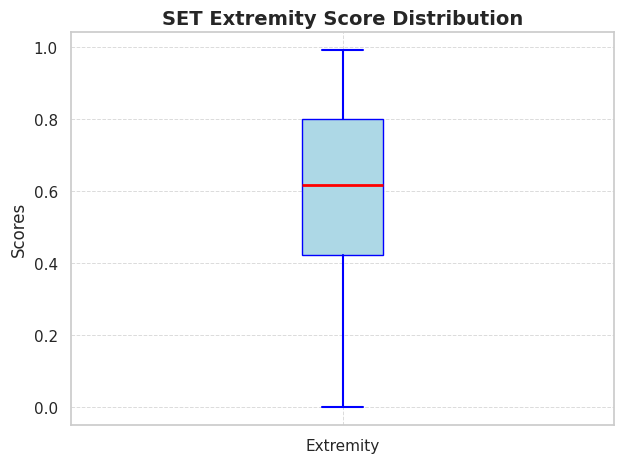

In [17]:
set_df["Extremity"].plot.box(
    patch_artist=True,  # Enable custom colors
    boxprops=dict(facecolor='lightblue', color='blue'),  # box
    medianprops=dict(color='red', linewidth=2),  # median line
    whiskerprops=dict(color='blue', linewidth=1.5),  # whiskers
    capprops=dict(color='blue', linewidth=1.5),  # caps
    flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
)

plt.title("SET Extremity Score Distribution", fontsize=14, fontweight='bold')
plt.ylabel('Scores')

# Customizing the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding some padding
plt.tight_layout()

plt.show()

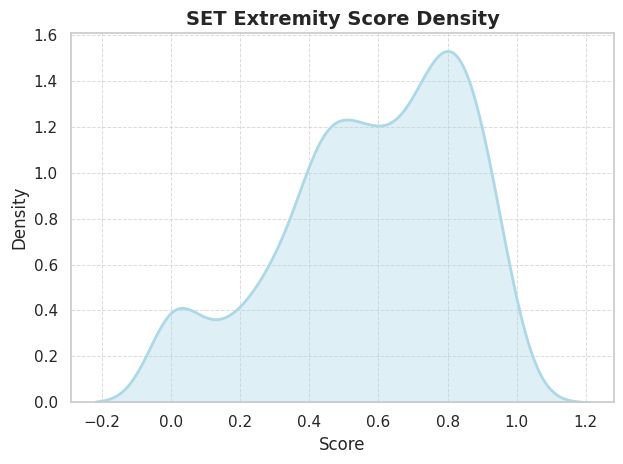

In [18]:
# Create the KDE plot
sns.kdeplot(set_df["Extremity"], 
            color='lightblue',  # Set line color
            fill=True,  # Fill under the KDE curve
            alpha=0.4,  # Transparency of the fill
            linewidth=2)  # Thickness of the line

# Add title and labels
plt.title("SET Extremity Score Density", fontsize=14, fontweight='bold')
plt.xlabel('Score')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

### tCF Data
Compound Score Analysis

In [19]:
var = "Compound Score"
print(tcf_df[var].describe(),'\n') # Describe the numeric variable

count    408.000000
mean       0.560070
std        0.462090
min       -0.946800
25%        0.370875
50%        0.729550
75%        0.896675
max        0.997200
Name: Compound Score, dtype: float64 



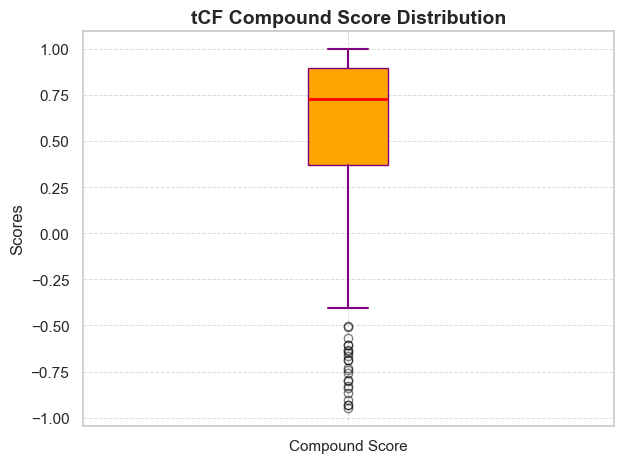

In [54]:
# tcf_df[var].plot.box()
tcf_df[var].plot.box(
    patch_artist=True,  # Enable custom colors
    boxprops=dict(facecolor='orange', color='purple'),  # box
    medianprops=dict(color='red', linewidth=2),  # median line
    whiskerprops=dict(color='purple', linewidth=1.5),  # whiskers
    capprops=dict(color='purple', linewidth=1.5),  # caps
    flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
)

plt.title("tCF Compound Score Distribution", fontsize=14, fontweight='bold')
plt.ylabel('Scores')

# Customizing the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding some padding
plt.tight_layout()

plt.show()

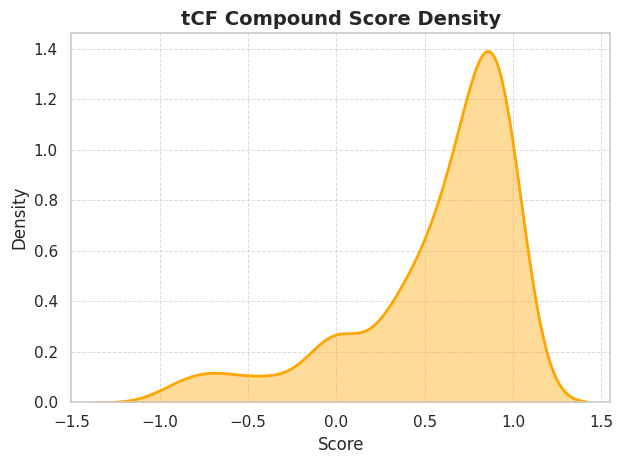

In [20]:
# tcf_df[var].hist()
# sns.kdeplot(tcf_df[var])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")  # Clean white background with gridlines

# Create the KDE plot
sns.kdeplot(tcf_df[var], 
            color='orange',  # Set line color
            fill=True,  # Fill under the KDE curve
            alpha=0.4,  # Transparency of the fill
            linewidth=2)  # Thickness of the line

# Add title and labels
plt.title("tCF Compound Score Density", fontsize=14, fontweight='bold')
plt.xlabel('Score')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

Comments with the top 5 scores.

In [21]:
# organize based on top 5 extremity
tcf_df.sort_values(by=["Extremity"], ascending=False).head()

,Semester,Last Updated,Review Text,Upvotes,Downvotes,Review Average,Instr Rating,Enoyability,Recommend,Difficulty,Hours Per Week,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity
130,Fall 2013,1/02/14,Elzinga is a legend. Take this course. Whether...,7,2,5.00,5,5,5,3,4,0.9972,0.193,0.798,0.009,0.9972
117,Fall 2014,1/04/15,"Elzinga is a really cute and caring guy, but m...",0,0,2.33,3,2,2,4,3,0.9961,0.289,0.695,0.016,0.9961
70,Fall 2017,12/10/17,This class is awesome. Unlike a lot of other c...,1,1,5.00,5,5,5,3,9,0.9954,0.193,0.793,0.014,0.9954
227,Fall 2010,9/16/10,Elzinga is totally awesome. This class is rea...,0,0,5.00,5,5,5,1,0,0.9941,0.273,0.638,0.089,0.9941
66,Fall 2017,12/16/17,"Honestly, I don't get all the hype about Profe...",5,1,2.67,3,2,3,2,5,0.9938,0.204,0.773,0.023,0.9938


In [22]:
# organize based on top 5 positive scores
tcf_df.sort_values(by=["Positive Score"], ascending=False).head()

,Semester,Last Updated,Review Text,Upvotes,Downvotes,Review Average,Instr Rating,Enoyability,Recommend,Difficulty,Hours Per Week,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity
345,Fall 2009,8/27/08,Awesome and pretty easy.,0,0,5.00,5,5,5,1,0,0.8807,0.911,0.089,0.0,0.8807
276,Fall 2009,9/01/09,"Pretty good, Mirman is better",0,0,1.67,2,1,2,2,2,0.8402,0.818,0.182,0.0,0.8402
351,Fall 2009,7/31/08,Great class!,0,0,4.00,4,4,4,4,0,0.6588,0.815,0.185,0.0,0.6588
326,Fall 2009,11/19/08,Awesome class!,0,0,3.00,3,3,3,3,0,0.6588,0.815,0.185,0.0,0.6588
275,Fall 2009,9/02/09,great prof!,0,0,4.67,4,5,5,5,2,0.6588,0.815,0.185,0.0,0.6588


In [23]:
# organize based on top 5 negative scores
tcf_df.sort_values(by=["Negative Score"], ascending=False).head()

,Semester,Last Updated,Review Text,Upvotes,Downvotes,Review Average,Instr Rating,Enoyability,Recommend,Difficulty,Hours Per Week,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity
299,Fall 2009,1/20/09,The final is a killer,0,0,4.00,4,4,4,3,0,-0.6486,0.000,0.411,0.589,0.6486
316,Fall 2009,12/12/08,I really enjoyed Elzinga but the final was a k...,0,0,4.67,5,4,5,4,0,-0.6862,0.161,0.421,0.418,0.6862
253,Fall 2009,12/01/09,great but demanding,0,0,4.67,5,5,4,4,3,0.0516,0.432,0.169,0.398,0.0516
362,Fall 2009,11/06/07,"Very worthwhile, but not as mind-blowingly ama...",0,0,4.00,4,3,5,3,0,-0.5042,0.132,0.573,0.294,0.5042
140,Fall 2013,12/13/13,I took this because I thought it would be inte...,0,0,2.33,3,2,2,3,0,-0.9290,0.059,0.648,0.292,0.9290


In [24]:
# organize based on top 5 compound scores
tcf_df.sort_values(by=["Compound Score"], ascending=True).head()

,Semester,Last Updated,Review Text,Upvotes,Downvotes,Review Average,Instr Rating,Enoyability,Recommend,Difficulty,Hours Per Week,Compound Score,Positive Score,Neutral Score,Negative Score,Extremity
168,Fall 2012,12/19/12,This was the worst class I have taken at UVA.(...,0,0,1.00,1,1,1,1,1,-0.9468,0.026,0.740,0.235,0.9468
82,Fall 2016,12/17/16,I don't really have a problem with Elzinga. A...,2,0,2.00,2,2,2,4,2,-0.9291,0.083,0.773,0.144,0.9291
140,Fall 2013,12/13/13,I took this because I thought it would be inte...,0,0,2.33,3,2,2,3,0,-0.9290,0.059,0.648,0.292,0.9290
11,Fall 2022,12/14/22,Kenneth Elzinga is a senile jerk who literally...,1,0,1.00,1,1,1,4,6,-0.9052,0.058,0.720,0.222,0.9052
315,Fall 2009,12/15/08,Elzinga's class has two faces. Everyone has he...,0,0,4.67,4,5,5,3,0,-0.8674,0.106,0.737,0.157,0.8674


Extremity Score Analysis

In [25]:
tcf_df["Extremity"].describe()

count    408.000000
mean       0.667439
std        0.285320
min        0.000000
25%        0.492300
50%        0.750650
75%        0.898825
max        0.997200
Name: Extremity, dtype: float64

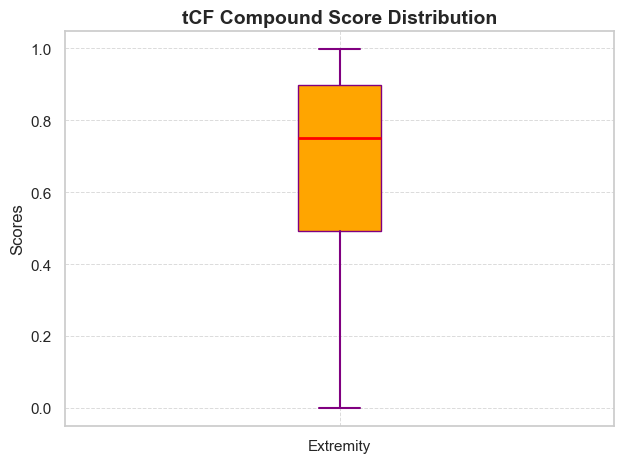

In [76]:
tcf_df["Extremity"].plot.box(
    patch_artist=True,  # Enable custom colors
    boxprops=dict(facecolor='orange', color='purple'),  # box
    medianprops=dict(color='red', linewidth=2),  # median line
    whiskerprops=dict(color='purple', linewidth=1.5),  # whiskers
    capprops=dict(color='purple', linewidth=1.5),  # caps
    flierprops=dict(marker='o', color='orange', alpha=0.5),  # outliers
)

plt.title("tCF Extremity Score Distribution", fontsize=14, fontweight='bold')
plt.ylabel('Scores')

# Customizing the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding some padding
plt.tight_layout()

plt.show()

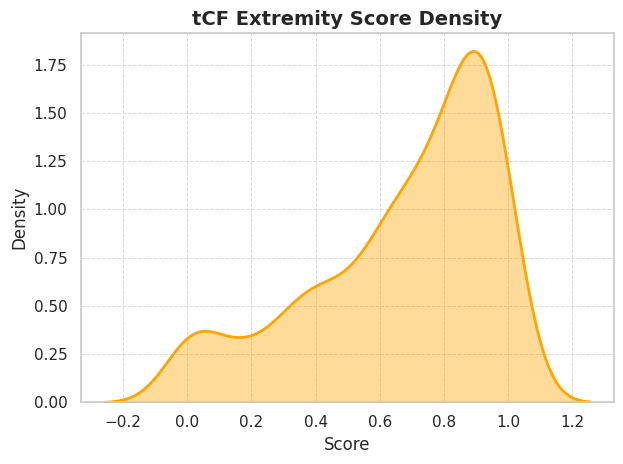

In [26]:
# Create the KDE plot
sns.kdeplot(tcf_df["Extremity"], 
            color='orange',  # Set line color
            fill=True,  # Fill under the KDE curve
            alpha=0.4,  # Transparency of the fill
            linewidth=2)  # Thickness of the line

# Add title and labels
plt.title("tCF Extremity Score Density", fontsize=14, fontweight='bold')
plt.xlabel('Score')  # X-axis label
plt.ylabel('Density')  # Y-axis label

# Add a grid with custom style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

In [27]:
# finding variance within theCourseForum compound reviews
variance_compound_score = tcf_df['Compound Score'].var()
print(f"Variance of Compound Score: {variance_compound_score}")

#finding variance within theCourseForum compound reviews without covid reviews
tcf_df_noCovid = tcf_df[~tcf_df['Semester'].str.contains('Fall 2020')]

variance_compound_score_noCovid = tcf_df_noCovid['Compound Score'].var()
print(f"Variance of Compound Score (after removing 2020 data): {variance_compound_score_noCovid}")

Variance of Compound Score: 0.21352749919201958
Variance of Compound Score (after removing 2020 data): 0.21415790312780547


### Overall Dataset Analysis

In [28]:
df.shape

(1022, 7)

In [29]:
from scipy.stats import ttest_ind

# Perform Welch's t-test: Testing the difference in language extremity (the absolute value of the compoind score) between 
t_statistic, p_value = ttest_ind(tcf_df["Extremity"], set_df["Extremity"], equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
  print("The difference in Extremity scores between TCF and SET is statistically significant.")
else:
  print("The difference in Extremity scores between TCF and SET is not statistically significant.")

T-statistic: 4.964152612589995
P-value: 8.391002448267301e-07
The difference in Extremity scores between TCF and SET is statistically significant.
